In [1]:
import sys
import numpy as np
from scipy import stats

# Import data from csv file
import pandas as pd
datos0 = pd.read_csv('./TEST_X003.csv')
datos0.head()

,IDENTIFICADOR,INGRESO_BRUTO_FINAL,EDAD,TIPO_CLIENTE,LINEA_TC_SF_M1,SALDO_TC_SF_M1,SALDO_PP_SF_M1,SALDO_VEH_SF_M1,SALDO_HIP_SF_M1,SALDO_CONV_SF_M1
0,11689996,1383.0,35,INDEPENDIENTE,NaN,NaN,NaN,NaN,NaN,NaN
1,12073740,1702.0,56,DEPENDIENTE,1177.85,738.72,5270.87,0.0,0.00,0.0
2,8823281,1194.0,41,INDEPENDIENTE,0.00,0.00,0.00,0.0,0.00,0.0
3,8500942,2157.0,56,DEPENDIENTE,13400.00,2164.80,0.00,0.0,5512.52,0.0
4,12756072,1626.0,28,INDEPENDIENTE,2800.00,1744.73,0.00,0.0,0.00,0.0


<h1> 1. RELACIÓN ENTRE INGRESOS Y DEUDAS </h1>

In [2]:
#1. RELACIÓN ENTRE INGRESOS Y DEUDAS
#filtramos los valores nulos con los que no se trabajará
datos = datos0.dropna(how='any')

<h2> 1.1. Evaluamos la correlación entre ingresos y tarjeta de crédito </h2>

In [3]:
#si se acerca a 1 es directamente correlativo
#si se acerca a -1 es inversamente correlativo
#si se acerca a 0 es que no hay correlación
from scipy import stats
stats.spearmanr(datos['INGRESO_BRUTO_FINAL'], datos['LINEA_TC_SF_M1']) #Returns:(Pearson’s correlation coef., p-value)

SpearmanrResult(correlation=0.56969075910271616, pvalue=0.0)

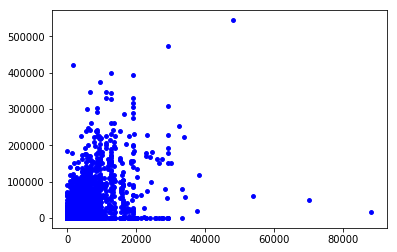

In [4]:
#Graficamos
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(datos['INGRESO_BRUTO_FINAL'], datos['LINEA_TC_SF_M1'], c='blue', s=15)

Conclusión 1.1.: Como coeficiente de correlación es: 0.57, entonces existe relación lineal entre ingresos y TC

<h2> 1.2. Evaluamos la correlación entre ingresos y préstamo personal </h2> 

In [5]:
stats.spearmanr(datos['INGRESO_BRUTO_FINAL'], datos['SALDO_PP_SF_M1'])

SpearmanrResult(correlation=0.23904867655504985, pvalue=3.49384990335936e-113)

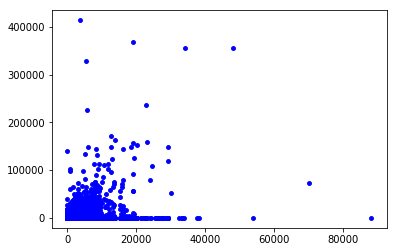

In [6]:
#Graficamos
plt.scatter(datos['INGRESO_BRUTO_FINAL'], datos['SALDO_PP_SF_M1'], c='blue', s=15)

Conclusión 1.2.: Como coeficiente de correlación es: 0.23, entonces existe relación lineal entre ingresos y PP

<h2> 1.3. Evaluamos la correlación entre ingresos y crédito vehicular </h2> 

In [7]:
stats.spearmanr(datos['INGRESO_BRUTO_FINAL'], datos['SALDO_VEH_SF_M1'])

SpearmanrResult(correlation=0.13802921449156647, pvalue=3.1622833302772646e-38)

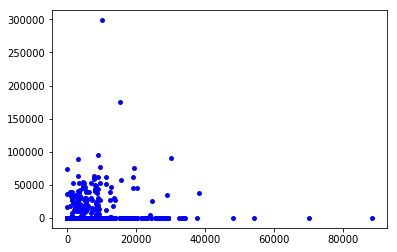

In [8]:
#Graficamos
plt.scatter(datos['INGRESO_BRUTO_FINAL'], datos['SALDO_VEH_SF_M1'], c='blue', s=15)

Conclusión 1.3.: Como coeficiente de correlación es: 0.14, entonces existe relación lineal entre ingresos y CV

<h2> 1.4. Evaluamos la correlación entre ingresos y crédito hipotecario </h2> 

In [9]:
stats.spearmanr(datos['INGRESO_BRUTO_FINAL'], datos['SALDO_HIP_SF_M1'])

SpearmanrResult(correlation=0.22813069419634061, pvalue=5.520775424097317e-103)

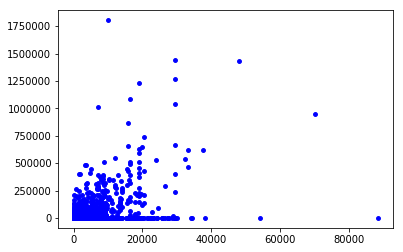

In [10]:
#Graficamos
plt.scatter(datos['INGRESO_BRUTO_FINAL'], datos['SALDO_HIP_SF_M1'], c='blue', s=15)

Conclusión 1.4.: Como coeficiente de correlación es: 0.23, entonces existe relación lineal entre ingresos y CH

<h2> 1.5. Evaluamos la correlación entre ingresos y crédito por convenio </h2> 

In [11]:
stats.spearmanr(datos['INGRESO_BRUTO_FINAL'], datos['SALDO_CONV_SF_M1'])

SpearmanrResult(correlation=0.10378664962112449, pvalue=3.0202834327276632e-22)

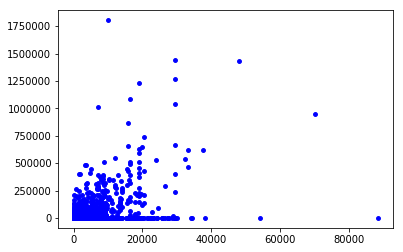

In [12]:
#Graficamos
plt.scatter(datos['INGRESO_BRUTO_FINAL'], datos['SALDO_HIP_SF_M1'], c='blue', s=15)

Conclusión 1.5.: Como coeficiente de correlación es: 0.10, entonces existe relación lineal entre ingresos y CC

<h2> 1.6. Evaluamos la correlación entre ingresos y la deuda total </h2> 

In [13]:
#deuda total
datos['DEUDA_TOTAL'] = datos['SALDO_TC_SF_M1'] + datos['SALDO_PP_SF_M1'] + datos['SALDO_VEH_SF_M1'] + datos['SALDO_HIP_SF_M1'] +datos['SALDO_CONV_SF_M1']
#datos.describe()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
#datos a evaluar en la correlación
datos_eval = datos[['INGRESO_BRUTO_FINAL','DEUDA_TOTAL']]
datos_eval.head()

,INGRESO_BRUTO_FINAL,DEUDA_TOTAL
1,1702.0,6009.59
2,1194.0,0.00
3,2157.0,7677.32
4,1626.0,1744.73
5,1516.0,0.00


In [15]:
#Analizamos la correlación
from scipy import stats
stats.spearmanr(datos_eval['INGRESO_BRUTO_FINAL'], datos_eval['DEUDA_TOTAL'])

SpearmanrResult(correlation=0.51767541923387683, pvalue=0.0)

<h3>Conclusión Final:</h3>  Como el coeficiente de correlación es: 0.52, entonces existe evidencia estadística para afirmar que hay relación lineal entre el ingreso bruto y deuda total y de lo anterior también concluir que existe relación lineal entre cada una de sus deudas e ingresos.

<h1>2. Relación entre la edad y su condición laboral</h1>

In [16]:
#devolvemos solo los datos a evaluar
datos_ed_cl = datos[['TIPO_CLIENTE','EDAD']]
datos_ed_cl.head()

,TIPO_CLIENTE,EDAD
1,DEPENDIENTE,56
2,INDEPENDIENTE,41
3,DEPENDIENTE,56
4,INDEPENDIENTE,28
5,INDEPENDIENTE,48


In [17]:
# Evaluamos la edad para los trabajadores independientes
#filtramos solo personas independientes
datos_indep = datos[datos['TIPO_CLIENTE']=='INDEPENDIENTE']
stats.normaltest(datos_indep['EDAD'])
datos_indep['EDAD'].mean()

41.93896321070234

In [18]:
# Evaluamos la edad para los trabajadores dependientes
datos_dep = datos[datos['TIPO_CLIENTE']=='DEPENDIENTE']
stats.normaltest(datos_dep['EDAD'])
datos_dep['EDAD'].mean()

42.136968766001026

In [19]:
#aplicamos t-student para evaluar la relación 
#from: https://stackoverflow.com/a/22613361
from scipy.stats import ttest_ind
def ttest(a, b):
    t, p = ttest_ind(a, b, equal_var=False)
    return print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest(datos_indep['EDAD'], datos_dep['EDAD'])

ttest_ind:            t = -0.685696  p = 0.492924


<h2>Conclusión: </h2>
NO existe relación entre la edad y la condición laboral debido a que p-valor es 0.5 y no podemos rechazar la hipótesis nula (medias de edad son iguales)

<h1>3. Nivel de endeudamiento depende de su condición laboral</h1>

In [20]:
#devolvemos solo los datos a evaluar
datos_cl_de = datos[['TIPO_CLIENTE','DEUDA_TOTAL']]
datos_cl_de.head()

,TIPO_CLIENTE,DEUDA_TOTAL
1,DEPENDIENTE,6009.59
2,INDEPENDIENTE,0.00
3,DEPENDIENTE,7677.32
4,INDEPENDIENTE,1744.73
5,INDEPENDIENTE,0.00


In [21]:
# Evaluamos la DEUDA para los trabajadores independientes
#filtramos solo personas independientes
datos2_indep = datos[datos['TIPO_CLIENTE']=='INDEPENDIENTE']
stats.normaltest(datos2_indep['DEUDA_TOTAL'])
datos2_indep['DEUDA_TOTAL'].mean()

11602.433563963223

In [22]:
# Evaluamos la DEUDA para los trabajadores independientes
#filtramos solo personas independientes
datos2_dep = datos[datos['TIPO_CLIENTE']=='DEPENDIENTE']
stats.normaltest(datos2_dep['DEUDA_TOTAL'])
datos2_dep['DEUDA_TOTAL'].mean()

24384.5664900154

In [23]:
#volvemos a aplicar t-test para evaluar la relación 
ttest(datos2_indep['DEUDA_TOTAL'], datos_dep['DEUDA_TOTAL'])

ttest_ind:            t = -7.9744  p = 1.80598e-15


<h2>Conclusión: </h2>
Existe relación entre la deuda y la condición laboral debido a que p-valor es muy pequeño.

<h1>4. Peruanos con comportamiento atípico (outliers)</h1>

In [24]:
#definimos la función para analizar atípicos
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [25]:
#analizamos los outliers por intercuantilicos 
outliers = outliers_iqr(datos['INGRESO_BRUTO_FINAL'])
datos.iloc[outliers].shape

(896, 11)

{'boxes': [<matplotlib.lines.Line2D at 0x1a15c0fba8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a15c19780>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a15c24470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a15c19fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a15c0fdd8>,
  <matplotlib.lines.Line2D at 0x1a15c19358>]}

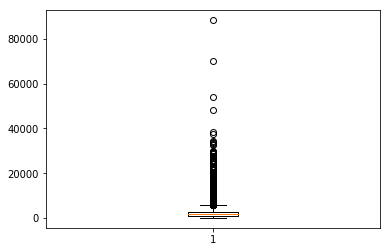

In [26]:
plt.boxplot(datos['INGRESO_BRUTO_FINAL'])

In [27]:
#mostrando los peruanos con comportamiento atípico
datos.iloc[outliers].head()

,IDENTIFICADOR,INGRESO_BRUTO_FINAL,EDAD,TIPO_CLIENTE,LINEA_TC_SF_M1,SALDO_TC_SF_M1,SALDO_PP_SF_M1,SALDO_VEH_SF_M1,SALDO_HIP_SF_M1,SALDO_CONV_SF_M1,DEUDA_TOTAL
9,9171307,8689.0,54,INDEPENDIENTE,0.00,0.00,0.00,0.0,0.00,3765.81,3765.81
20,8954232,8906.0,53,INDEPENDIENTE,159952.80,87704.74,0.00,0.0,505673.84,0.00,593378.58
40,9233120,6000.0,57,INDEPENDIENTE,128751.00,38814.06,2482.19,0.0,0.00,0.00,41296.25
42,12534833,7088.0,33,INDEPENDIENTE,1145.47,0.00,0.00,0.0,0.00,0.00,0.00
67,9536060,7831.0,36,DEPENDIENTE,34466.16,12946.38,0.00,59565.0,0.00,0.00,72511.38


<h2>Conclusión: </h2>
Existen 896 peruanos que se comportan de manera atípica.  